In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import DataClass as dc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Passo 1: Carregar os datasets e converter os valores não numéricos para valores numéricos
dt2 = pd.read_csv(dc.CSV_PATH_2)
dt5 = pd.read_csv(dc.CSV_PATH_5)
dt7 = pd.read_csv(dc.CSV_PATH_7)

dt = pd.concat([dt2, dt5, dt7], ignore_index=True)

pd.set_option('display.max_columns', None)

# Identificar colunas não numéricas
non_numeric_columns = dt.select_dtypes(include=['object']).columns

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Converter colunas não numéricas para valores numéricos
for column in non_numeric_columns:
    dt[column] = label_encoder.fit_transform(dt[column])

print(dt.head())

      Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0  14537      3166                198      6                           192   
1   1154      2877                342     13                           450   
2  14507      3103                 48      7                             0   
3   7196      2950                269     39                           450   
4   1801      2868                332     17                            60   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                          -4                             3137   
1                         131                              618   
2                           0                             1034   
3                         316                             1528   
4                          23                             1718   

   Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  \
0              218               245               163   
1              193

Univariate Analysis for Altitude
Frequency Distribution:
Altitude
2830    21
2820    21
2809    19
2807    18
2763    18
        ..
3038     1
2579     1
3792     1
3197     1
3431     1
Name: count, Length: 976, dtype: int64


Mean: 2948.4553656220323
Median: 2873.0
Mode: 2820
Standard Deviation: 256.62249393872423
Range: 1612
Variance: 65855.10439533056
IQR: 365.25
Skewness: 0.7365259859473773
Kurtosis: -0.24963556351854388




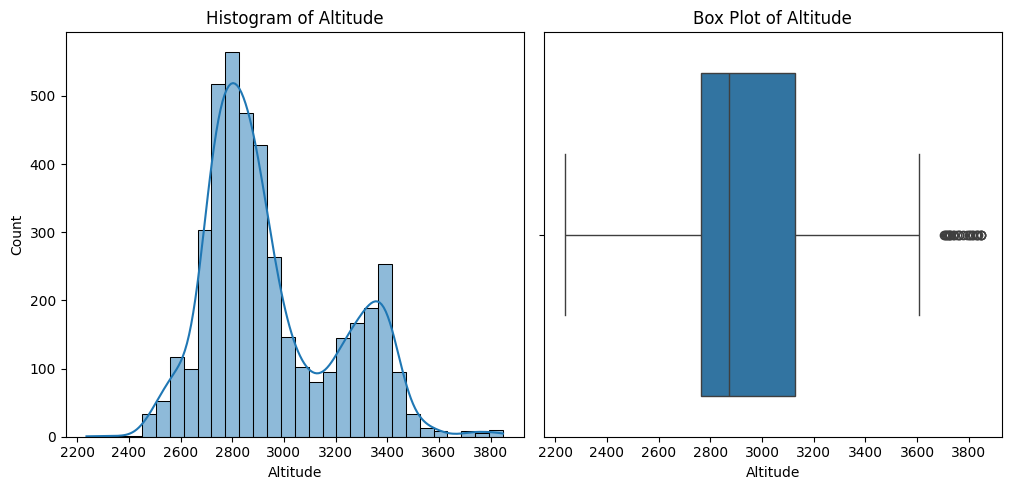

Univariate Analysis for Slope_Orientation
Frequency Distribution:
Slope_Orientation
63     44
76     37
86     31
94     31
96     31
       ..
221     2
245     1
249     1
271     1
256     1
Name: count, Length: 360, dtype: int64


Mean: 146.56885090218424
Median: 117.0
Mode: 63
Standard Deviation: 101.83047435701401
Range: 359
Variance: 10369.445507774488
IQR: 150.0
Skewness: 0.6239111107423263
Kurtosis: -0.7946127179781568




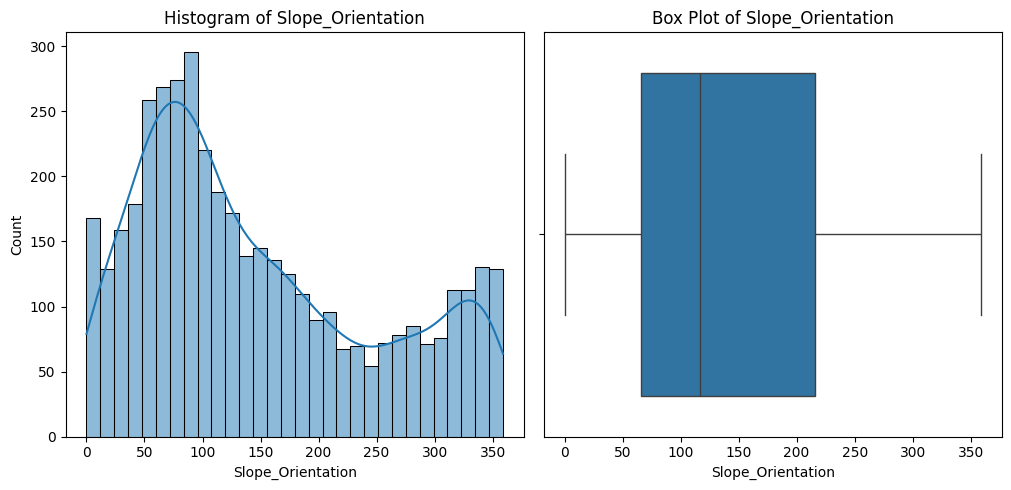

Univariate Analysis for Slope
Frequency Distribution:
Slope
9     236
13    229
11    216
10    215
14    215
12    214
15    211
7     201
16    191
18    182
8     178
17    153
6     153
20    147
19    143
5     139
22    120
21    106
23    105
4     103
24     81
3      74
25     70
26     67
27     65
29     63
28     55
2      46
31     38
30     37
32     31
33     31
1      20
35     17
34     16
39     10
46      8
36      7
49      4
37      3
45      2
44      2
47      2
38      2
40      1
48      1
50      1
0       1
Name: count, dtype: int64


Mean: 15.012820512820513
Median: 14.0
Mode: 9
Standard Deviation: 7.896283686400633
Range: 50
Variance: 62.351296056116766
IQR: 11.0
Skewness: 0.7742911354522254
Kurtosis: 0.6499092020157149




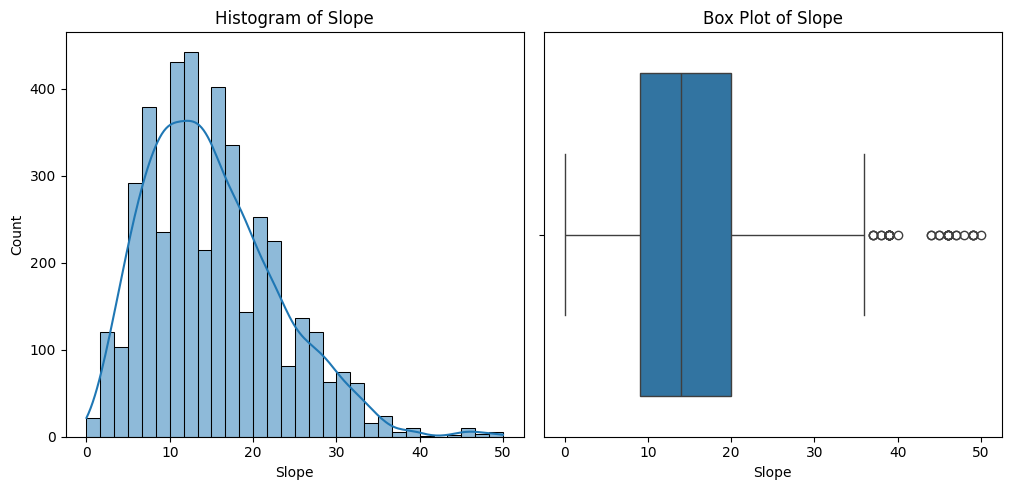

Univariate Analysis for Horizontal_Distance_To_Water
Frequency Distribution:
Horizontal_Distance_To_Water
0       249
30      234
60      134
150     134
67      111
       ... 
793       1
967       1
1318      1
926       1
911       1
Name: count, Length: 326, dtype: int64


Mean: 265.6949192782526
Median: 212.0
Mode: 0
Standard Deviation: 225.6762006926668
Range: 1343
Variance: 50929.74755907683
IQR: 271.0
Skewness: 1.3783376090948167
Kurtosis: 2.0817664626153753




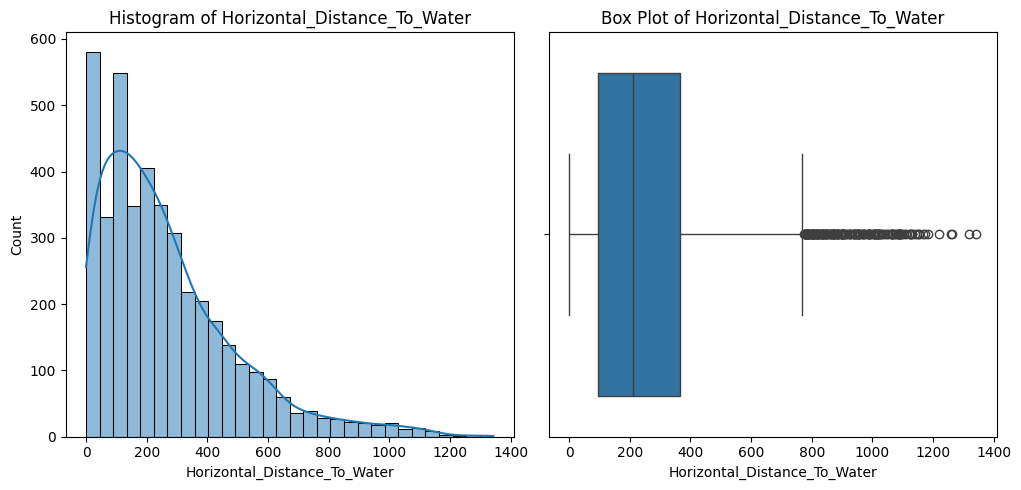

Univariate Analysis for Vertical_Distance_To_Water
Frequency Distribution:
Vertical_Distance_To_Water
 0      326
 4       74
 3       66
 13      58
 8       58
       ... 
 252      1
-61       1
 173      1
 232      1
 289      1
Name: count, Length: 352, dtype: int64


Mean: 53.674264007597344
Median: 36.0
Mode: 0
Standard Deviation: 64.3179237806495
Range: 693
Variance: 4136.7953194534375
IQR: 74.0
Skewness: 1.6414079895736136
Kurtosis: 4.386582199697147




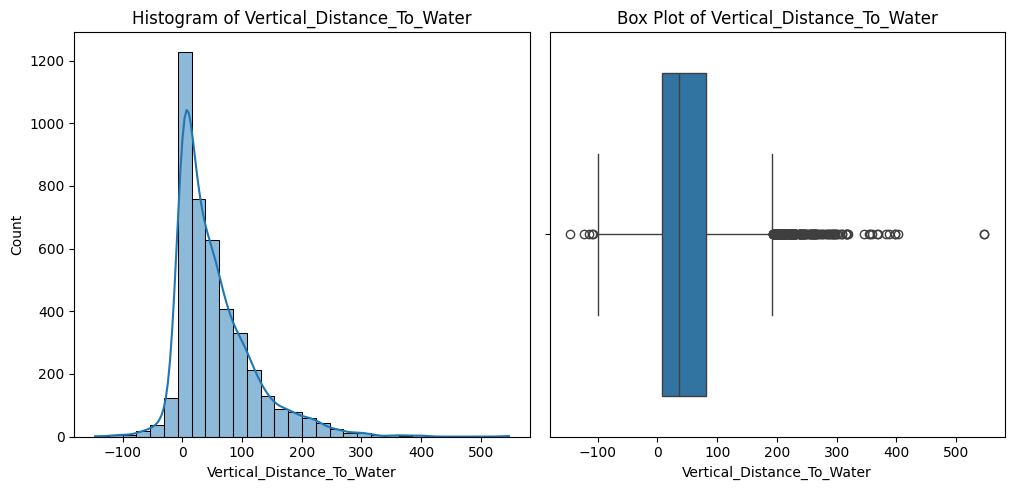

Univariate Analysis for Horizontal_Distance_To_Roadways
Frequency Distribution:
Horizontal_Distance_To_Roadways
150     43
120     31
210     17
124     15
240     14
        ..
4542     1
5369     1
4152     1
3331     1
2300     1
Name: count, Length: 2054, dtype: int64


Mean: 1974.7932098765432
Median: 1717.0
Mode: 150
Standard Deviation: 1436.4643785769279
Range: 6806
Variance: 2063429.9109203997
IQR: 1807.5
Skewness: 0.9003654750573478
Kurtosis: 0.1870574422355431




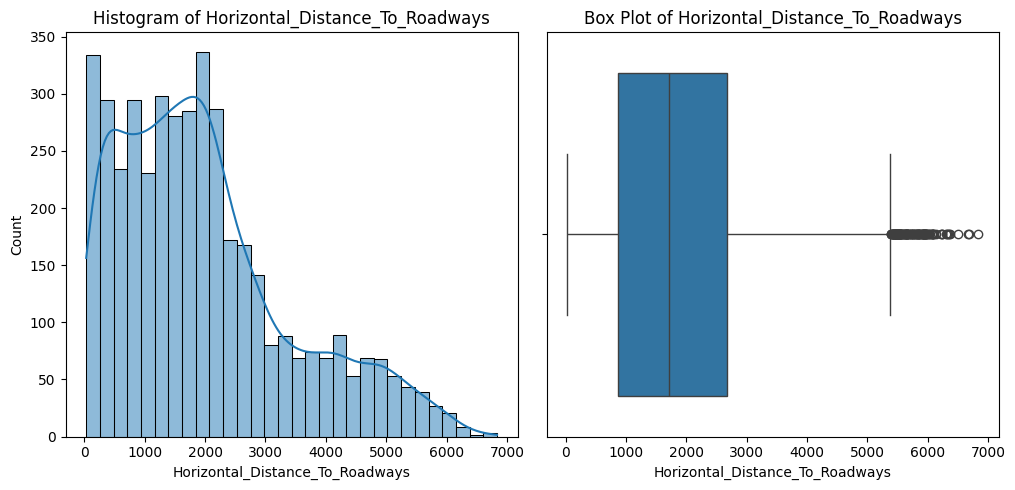

Univariate Analysis for Shadow_Index_9h
Frequency Distribution:
Shadow_Index_9h
230    104
224    101
228     93
233     92
226     88
      ... 
104      1
143      1
120      1
83       1
114      1
Name: count, Length: 135, dtype: int64


Mean: 218.78893637226972
Median: 224.0
Mode: 230
Standard Deviation: 23.765034434150603
Range: 171
Variance: 564.7768616563638
IQR: 31.0
Skewness: -1.0468728275664723
Kurtosis: 1.38121962308849




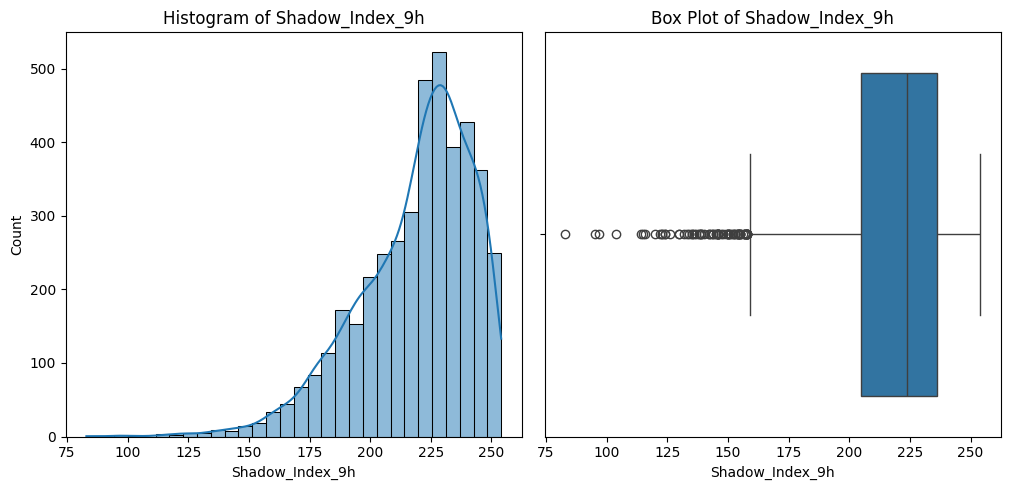

Univariate Analysis for Shadow_Index_12h
Frequency Distribution:
Shadow_Index_12h
224    104
230     96
232     94
231     94
234     93
      ... 
147      1
118      1
141      1
115      1
140      1
Name: count, Length: 123, dtype: int64


Mean: 221.61182336182335
Median: 225.0
Mode: 224
Standard Deviation: 22.585736442863404
Range: 155
Variance: 510.11549066648803
IQR: 27.0
Skewness: -1.2543499350740914
Kurtosis: 2.513077147037489




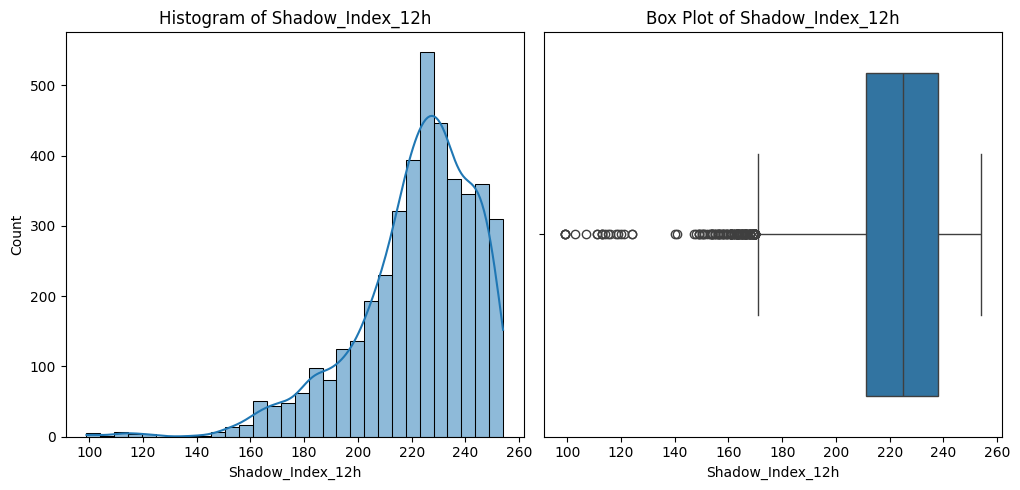

Univariate Analysis for Shadow_Index_15h
Frequency Distribution:
Shadow_Index_15h
138    64
150    55
137    53
142    51
148    51
       ..
234     1
237     1
240     1
232     1
11      1
Name: count, Length: 228, dtype: int64


Mean: 131.9377967711301
Median: 136.0
Mode: 138
Standard Deviation: 43.864852847195465
Range: 248
Variance: 1924.1253153061118
IQR: 55.25
Skewness: -0.49458589545788595
Kurtosis: 0.12298657654483192




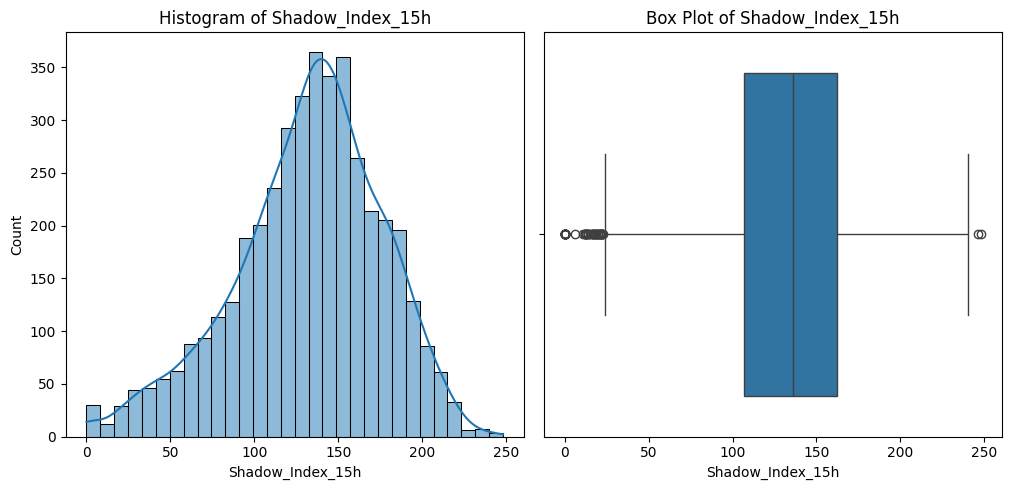

Univariate Analysis for Horizontal_Distance_To_Fire_Points
Frequency Distribution:
Horizontal_Distance_To_Fire_Points
618     15
700     14
1448    14
912     13
997     11
        ..
2716     1
5906     1
2856     1
1033     1
2805     1
Name: count, Length: 1860, dtype: int64


Mean: 1858.3986229819564
Median: 1649.0
Mode: 618
Standard Deviation: 1197.4082916395741
Range: 6681
Variance: 1433786.6168872034
IQR: 1303.0
Skewness: 1.481200386531717
Kurtosis: 2.579023919407253




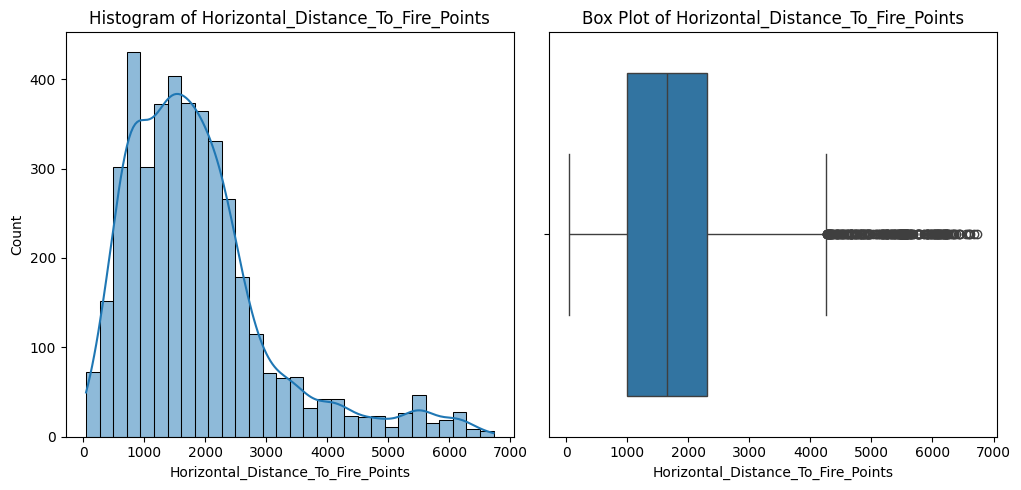

Univariate Analysis for Canopy_Density
Frequency Distribution:
Canopy_Density
88.19    5
62.61    5
65.96    5
44.02    5
51.04    5
        ..
55.64    1
36.77    1
36.72    1
47.30    1
41.05    1
Name: count, Length: 3023, dtype: int64


Mean: 59.5162155745489
Median: 59.375
Mode: 44.02
Standard Deviation: 17.235468296198974
Range: 59.980000000000004
Variance: 297.06136738928
IQR: 29.765
Skewness: 0.025696387358883053
Kurtosis: -1.1798441642228514




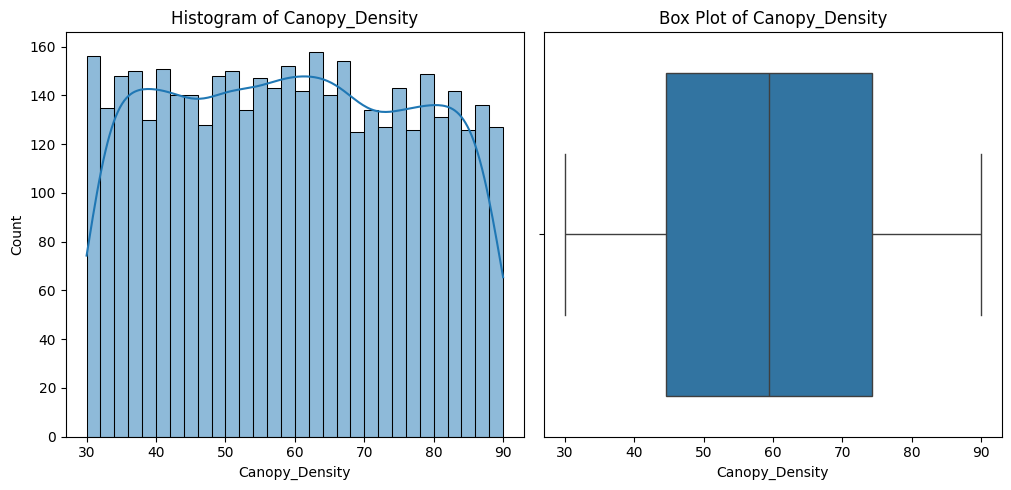

Univariate Analysis for Rainfall_Summer
Frequency Distribution:
Rainfall_Summer
218.17    3
156.54    3
164.78    3
423.37    3
248.03    3
         ..
365.91    1
384.13    1
412.71    1
300.96    1
368.61    1
Name: count, Length: 3914, dtype: int64


Mean: 301.91070512820517
Median: 303.095
Mode: 151.95
Standard Deviation: 86.09935961106075
Range: 299.91
Variance: 7413.0997254347585
IQR: 148.0575
Skewness: -0.0377826727736863
Kurtosis: -1.1799161777815668




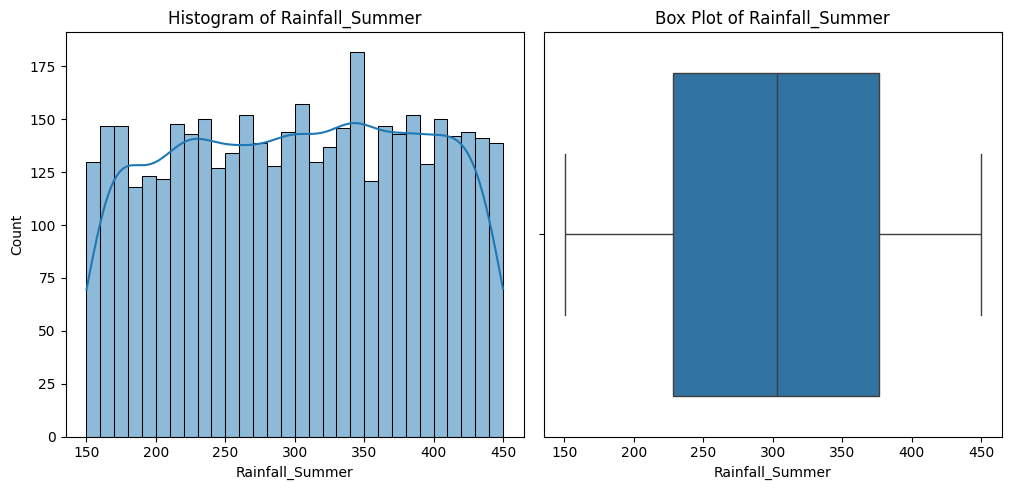

Univariate Analysis for Rainfall_Winter
Frequency Distribution:
Rainfall_Winter
655.16     3
374.59     2
231.30     2
176.70     2
503.82     2
          ..
94.67      1
418.72     1
838.12     1
1117.90    1
923.80     1
Name: count, Length: 4142, dtype: int64


Mean: 638.248777302944
Median: 631.595
Mode: 655.16
Standard Deviation: 319.2106465681423
Range: 1109.18
Variance: 101895.43688245147
IQR: 555.69
Skewness: 0.03919103294439981
Kurtosis: -1.1983778413632151




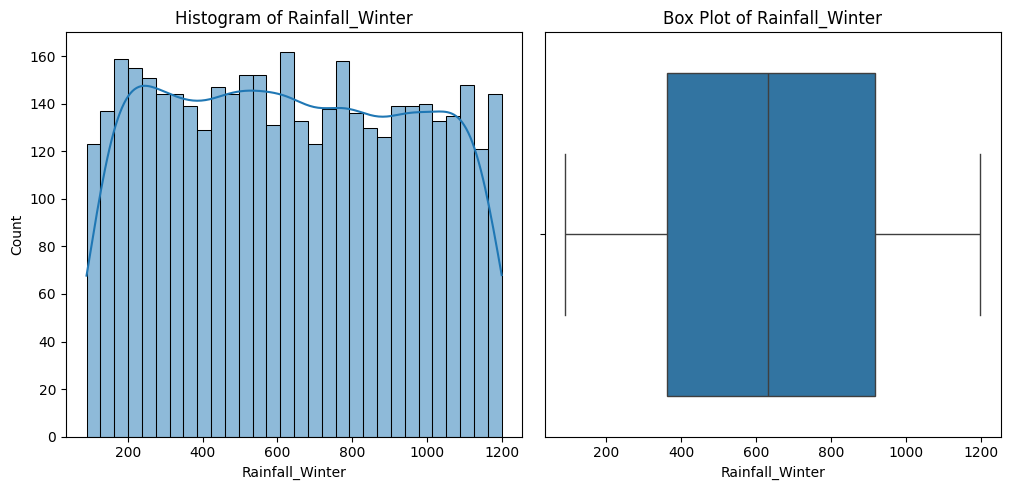

Univariate Analysis for Wind_Exposure_Level
Frequency Distribution:
Wind_Exposure_Level
53.55    5
55.54    5
58.19    4
61.39    4
49.22    4
        ..
18.08    1
9.48     1
55.48    1
53.22    1
29.51    1
Name: count, Length: 3044, dtype: int64


Mean: 34.902718423551754
Median: 34.805
Mode: 53.55
Standard Deviation: 17.187517834530073
Range: 59.97
Variance: 295.4107693122893
IQR: 29.47
Skewness: -0.0044281918012611995
Kurtosis: -1.1949127098081347




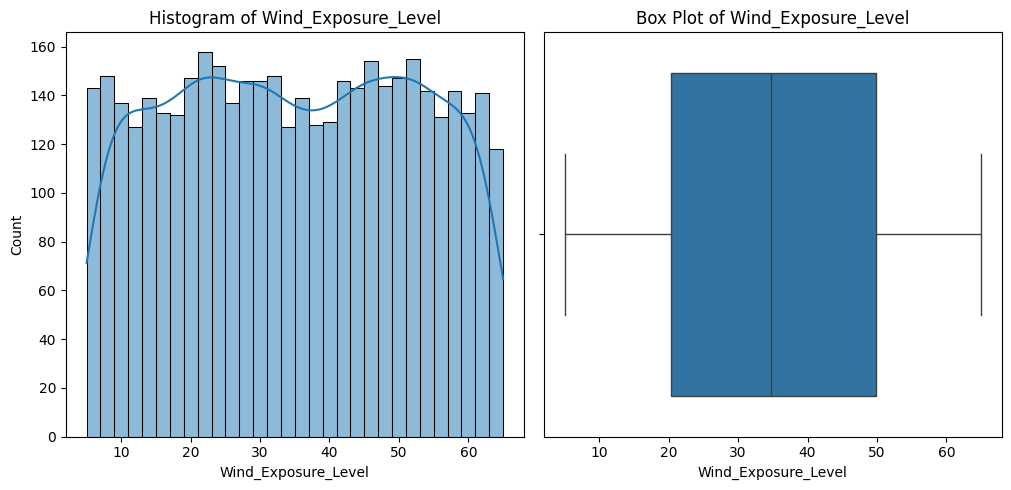

Univariate Analysis for Soil_Type
Frequency Distribution:
Soil_Type
18    630
20    536
3     326
12    264
28    263
23    262
22    253
29    231
1     187
31    162
2     155
21    148
30    129
5     119
0     111
13     70
8      59
6      56
11     44
9      42
15     35
25     33
7      25
24     15
4      15
27     11
19      7
26      5
17      5
16      4
34      3
32      3
10      2
33      1
14      1
Name: count, dtype: int64


Mean: 16.726495726495727
Median: 18.0
Mode: 18
Standard Deviation: 9.408698652024503
Range: 34
Variance: 88.5236103246077
IQR: 14.25
Skewness: -0.3474332563828249
Kurtosis: -1.027242840868142




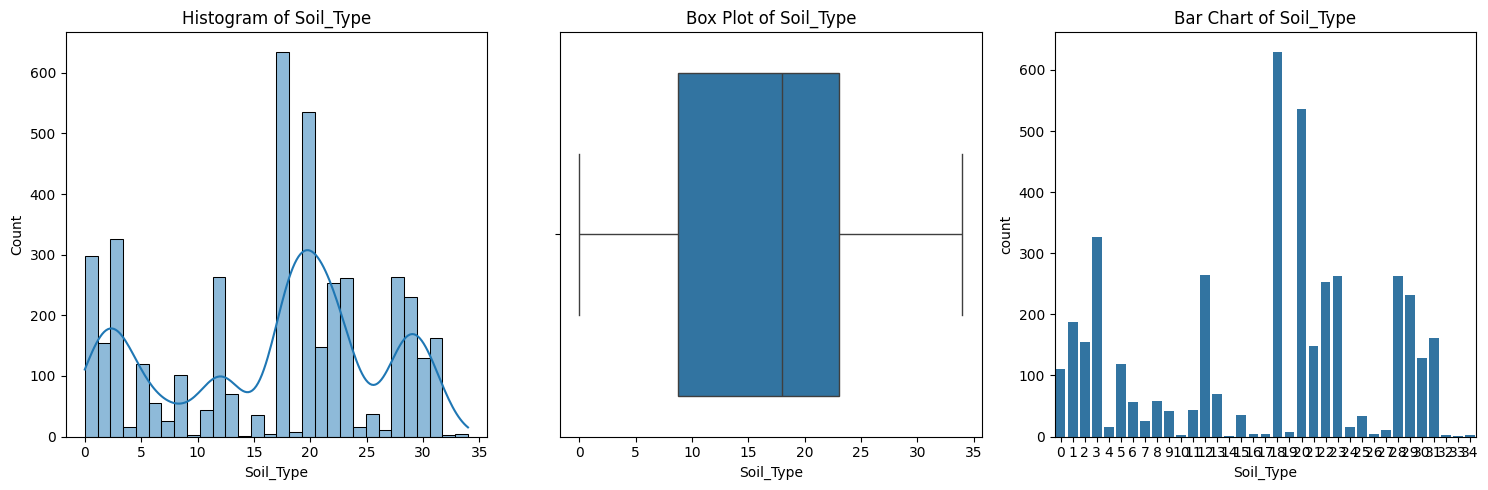

Univariate Analysis for Wilderness_Area
Frequency Distribution:
Wilderness_Area
2    2301
0    1753
1     149
3       9
Name: count, dtype: int64


Mean: 1.134377967711301
Median: 2.0
Mode: 2
Standard Deviation: 0.9763216714995658
Range: 3
Variance: 0.9532040062397062
IQR: 2.0
Skewness: -0.2574334723747043
Kurtosis: -1.875695829451868




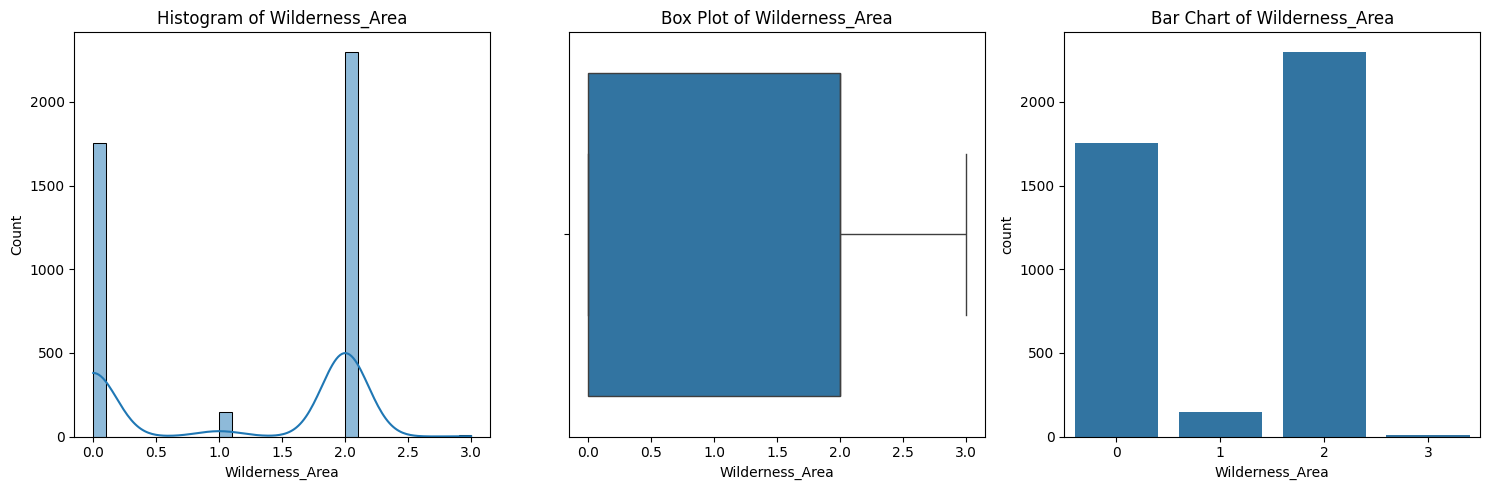

Univariate Analysis for Vegetation_Type
Frequency Distribution:
Vegetation_Type
1    1944
0    1404
2     864
Name: count, dtype: int64


Mean: 0.8717948717948718
Median: 1.0
Mode: 1
Standard Deviation: 0.7225987479581979
Range: 2
Variance: 0.5221489505507553
IQR: 1.0
Skewness: 0.19807409427061515
Kurtosis: -1.0732875614185708




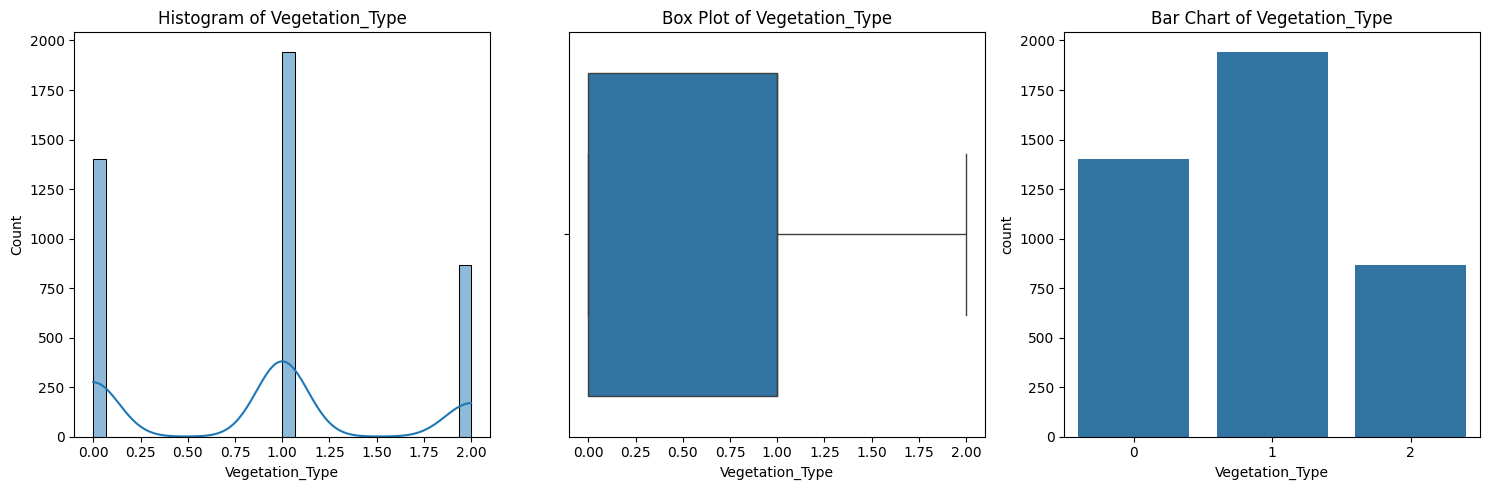

In [8]:

# Passo 2: Univariate Analysis (Distribution of individual features)
def univariate_analysis(data, column_name):
    print(f'Univariate Analysis for {column_name}')
    mean_value = data[column_name].mean()
    median_value = data[column_name].median()
    mode_value = data[column_name].mode()[0]
    std_dev_value = data[column_name].std()
    range_value = data[column_name].max() - data[column_name].min()
    variance_value = data[column_name].var()
    iqr_value = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
    skewness_value = data[column_name].skew()
    kurtosis_value = data[column_name].kurtosis()

    # Frequency Distribution
    frequency_distribution = data[column_name].value_counts()
    print('Frequency Distribution:')
    print(frequency_distribution)
    print('\n')

    # Central Tendency
    print(f'Mean: {mean_value}')
    print(f'Median: {median_value}')
    print(f'Mode: {mode_value}')

    # Variability
    print(f'Standard Deviation: {std_dev_value}')
    print(f'Range: {range_value}')
    print(f'Variance: {variance_value}')
    print(f'IQR: {iqr_value}')

    # Skewness and Kurtosis
    print(f'Skewness: {skewness_value}')
    print(f'Kurtosis: {kurtosis_value}')
    print('\n')

    # Visualization
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column_name], kde=True, bins=30)
    plt.title(f'Histogram of {column_name}')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')

    # Bar Chart (for categorical features)
    if data[column_name].dtype == 'int' or data[column_name].dtype == 'object':
        plt.subplot(1, 3, 3)
        sns.countplot(x=data[column_name])
        plt.title(f'Bar Chart of {column_name}')

    plt.tight_layout()
    plt.show()

# Lista de variáveis para análise
variables_to_analyze = [
    dc.ALTITUDE,
    dc.SLOPE_ORIENTATION,
    dc.SLOPE,
    dc.HORIZONTAL_DISTANCE_TO_WATER,
    dc.VERTICAL_DISTANCE_TO_WATER,
    dc.HORIZONTAL_DISTANCE_TO_ROADWAYS,
    dc.SHADOW_INDEX_9,
    dc.SHADOW_INDEX_12,
    dc.SHADOW_INDEX_15,
    dc.HORIZONTAL_DISTANCE_TO_FIRE_POINTS,
    dc.CANOPY_DENSITY,
    dc.RAINFALL_SUMMER,
    dc.RAINFALL_WINTER,
    dc.WIND_EXPOSURE_LEVEL,
    dc.SOIL_TYPE,
    dc.WILDERNESS_AREA,
    dc.VEGETATION_TYPE
]

# Realizar a análise univariada para cada variável
for variable in variables_to_analyze:
    univariate_analysis(dt, variable)